## Panel 5D
This notebook generates the bar chart in Fig. 5D

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.pylab as pylab

# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['legend.fontsize'] = 6

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np

In [2]:
# read in simulation data
NTD_KA_star = np.loadtxt('data/NTD_normalized_Ka.csv', delimiter=',')
RBD_KA_star = np.loadtxt('data/RBD_normalized_Ka.csv', delimiter=',')
NTD_RBD_KA_star = np.loadtxt('data/NTDRBD_normalized_Ka.csv', delimiter=',')


In [3]:
raw_exp_Ka_NTDRBD = np.loadtxt('data/experimental_data_NTDRBD.csv', delimiter=',')
raw_exp_Ka_RBD = np.loadtxt('data/experimental_data_RBD.csv', delimiter=',')


### Error propagation of ratios
To propagate the error in our ratios for calculating $K_A^*$ we use the following expression:

$\dfrac{R_{error}}{R} = \sqrt{\Big(\dfrac{A_{error}}{A}\Big)^2 + \Big(\dfrac{B_{error}}{B}\Big)^2}$

Where here $R$ and $R_{error}$ are the ratio and ratio error, and then $A$, $B$, $A_{error}$ and $B_{error}$ are the values of the numerator and denominator of our ratios and the associated errors, respectively. 

We propagate 'error' here as standard deviation for consistency with the simulation error propagation. As mentioned the standard error of the mean from independent simulations yields errors that are essentiall smaller than the tick marks, such that std provides an assessment of the distribution of Ka values obtained (as opposed to the 'error' in our ability to estimate the true population expected value).

In [9]:
# get the raw Ka value  (in nM-1)
ref_Ka = raw_exp_Ka_NTDRBD[5][2]
ref_Ka_std = raw_exp_Ka_NTDRBD[5][3]

# get normalized Ka_star
exp_NTD_RBD_KA_star = raw_exp_Ka_NTDRBD.transpose()[2]/ref_Ka
exp_RBD_KA_star = raw_exp_Ka_RBD.transpose()[2]/ref_Ka


# NTD-RBD error
tmp_all_std = raw_exp_Ka_NTDRBD.transpose()[3]
tmp_all_mean = raw_exp_Ka_NTDRBD.transpose()[2]
exp_NTD_RBD_KA_star_std = np.sqrt(np.power(tmp_all_std/tmp_all_mean,2) + np.power(ref_Ka_std/ref_Ka,2))*exp_NTD_RBD_KA_star


tmp_all_std = raw_exp_Ka_RBD.transpose()[3]
tmp_all_mean = raw_exp_Ka_RBD.transpose()[2]
exp_RBD_KA_star_std = np.sqrt(np.power(tmp_all_std/tmp_all_mean,2) + np.power(ref_Ka_std/ref_Ka,2))*exp_RBD_KA_star


In [5]:
# note 5 is just the index into the rU25 data

sim_rU25_NTD = NTD_KA_star[5][1]
sim_rU25_RBD = RBD_KA_star[5][1]
sim_rU25_NTD_RBD = NTD_RBD_KA_star[5][1]

sim_rU25_NTD_std = NTD_KA_star[5][2]
sim_rU25_RBD_std = RBD_KA_star[5][2]
sim_rU25_NTD_RBD_std = NTD_RBD_KA_star[5][2]


exp_rU25_NTD_RBD = exp_NTD_RBD_KA_star[5]
exp_rU25_RBD    = exp_RBD_KA_star[5]

exp_rU25_NTD_RBD_std = exp_NTD_RBD_KA_star_std[5]
exp_rU25_RBD_std    = exp_RBD_KA_star_std[5]

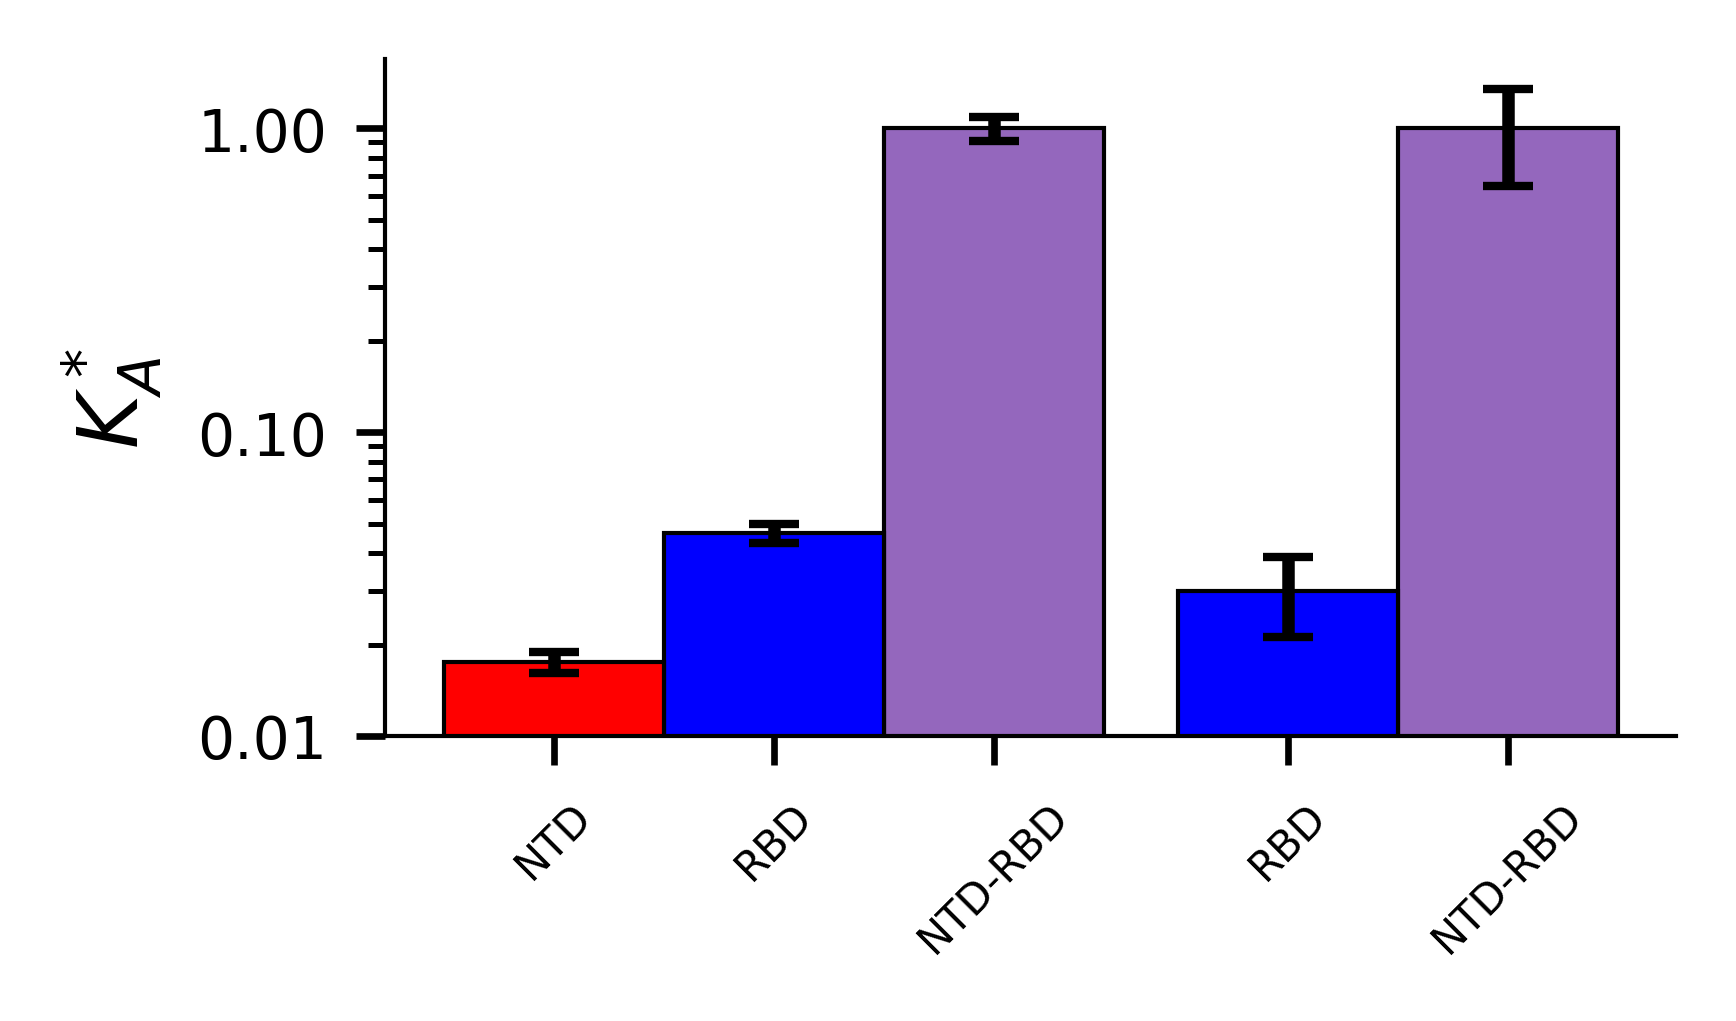

In [7]:
import matplotlib.ticker as ticker
figure(None, (3.,1.8), dpi=300)

x = [0, .6, 1.2, 2, 2.6]


ax = plt.subplot()
ax.bar(1.2,  sim_rU25_NTD_RBD, yerr = sim_rU25_NTD_RBD_std, color = 'tab:purple',
       ecolor='black', capsize=3, width = .6, align='center', edgecolor = "black",linewidth = .5)

ax.bar(.6,  sim_rU25_RBD, yerr = sim_rU25_RBD_std, color = 'blue', 
       label='NTD Naive',ecolor='black', capsize=3, width = .6, align='center', edgecolor = "black",linewidth = .5)

ax.bar(0.,  sim_rU25_NTD, yerr = sim_rU25_NTD_std, color = 'red', 
       label='NTD Naive',ecolor='black', capsize=3, width = .6, align='center', edgecolor = "black",linewidth = .5)


ax2 = plt.subplot()
ax2.bar(2.6, exp_rU25_NTD_RBD, yerr = exp_rU25_NTD_RBD_std, color = 'tab:purple',
             label=r'NTDRBD experiment', ecolor='black', capsize=3, width = .6, edgecolor = "black",linewidth = .5)
ax2.bar(2, exp_rU25_RBD, yerr = exp_rU25_RBD_std, color = 'blue',
             label=r'NTDRBD experiment', ecolor='black', capsize=3, width = .6, edgecolor = "black",linewidth = .5)

ax2 = plt.subplot()



ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 
#plt.xticks(x, labels= l)
#plt.xticks(p, labels= g)

#plt.ylabel(r'Ratio of $k_a$ Normalized to NTDRBD for rU25',fontsize=8)
#plt.xlabel('RNA length (nt)',fontsize=8)
plt.yticks(fontsize=7)
plt.xticks([0, .6, 1.2, 2, 2.6], ['NTD','RBD','NTD-RBD', 'RBD', 'NTD-RBD'],fontsize=5, rotation=45, ha='center' )

#ax.plot([1, 10, 100], [1,2,3])
#ax.set_scale('log')
plt.yscale('log')
ax.set_yticks([.01, .1, 1])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.ylabel(r'$K_{A}^*$')
plt.tight_layout()

plt.savefig("BarGraphKa_Ratio_NTDRBD_error.pdf")

